In [1]:
import numpy as np
from matplotlib import pyplot as plt
import imageio

In [2]:
x = np.arange(12).reshape((3,4))
y = np.arange(3).reshape((3,1))
print('x:',x,'y:',y,'x+y:',x+y,sep='\n')

x:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
y:
[[0]
 [1]
 [2]]
x+y:
[[ 0  1  2  3]
 [ 5  6  7  8]
 [10 11 12 13]]


In [3]:
print(np.random.uniform(size=(3,1)))

[[0.04740376]
 [0.13524605]
 [0.65602964]]


In [8]:
tile_test = range(3)
np.tile(tile_test, [5, 2])

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [21]:
# Meshgrid test
x = y = np.linspace(-2,2,5)
X,Y = np.meshgrid(x,y)
print(f"X:\n{X}")
print(f"Y:\n{Y}")

X:
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
Y:
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


In [5]:
# Create data for unit sphere to save as file
res = 640
x = y = np.linspace(-2, 2, res)
X, Y = np.meshgrid(x, y)
# Returns function values
# f(x,y) = { sqrt(1 - (x**2 + y**2)) + 1    if x**2 + y**2 <= 1,
#          { 0                              otherwise.
def unit_sphere(x, y):
    z_vals = (1 - (x**2 + y**2))
    neg_mask = z_vals < 0
    z_vals[neg_mask] = 0
    z_vals = np.sqrt(z_vals) + 1
    z_vals[neg_mask] = 0
    return z_vals
# Nonzero values are between 1 and 2.
Z = unit_sphere(X, Y)
# Make values between 0 and 256.
sphere = ((Z / 2) * 256).astype(np.uint8)

# Print data and save file "sphere.png".

# print(np.min(Z), np.max(Z))
# print(np.min(sphere), np.max(sphere))

# imageio.imwrite('sphere.png', sphere)

# plt.pcolormesh(X,Y,Z, cmap='gray')
# plt.axis('equal')
# plt.show()

In [6]:
h = (.35**2 + .5**2)**.5 + .125
print(h)

0.7353277807866851


In [138]:
# Smiley helper functions pg1.
def left_eye(xy_mesh, off=True):
    """Uses meshgrid."""
    # Define eye region.
    vals = ((.125)**2 - ((xy_mesh[0] + .35)**2 + (xy_mesh[1] - .4)**2))
    mask = vals < 0
#     # Zero other regions.
#     vals[mask] = 0
#     vals /= np.max(vals)
#     vals = vals**.8
    # One level eye.
    vals[~mask] = .05
    vals[mask] = 0
    if off:
        vals[vals != 0] += 1
    return vals

def right_eye(xy_mesh, off=True):
    """Uses meshgrid."""
    # Define eye region.
    vals = ((.125)**2 - ((xy_mesh[0] - .35)**2 + (xy_mesh[1] - .4)**2))
    mask = vals < 0
#     # Zero other regions.
#     vals[mask] = 0
#     vals /= np.max(vals)
#     vals = vals**.8
    # One level eye.
    vals[~mask] = .05
    vals[mask] = 0
    if off:
        vals[vals != 0] += 1
    return vals


In [152]:
# Smiley helper functions pg2.
def smile1(xy_mesh, off=True):
    """An opened mouth smile.
    Uses meshgrid."""
    m,n = xy_mesh[0].shape
    # Define smile region.
    radius = 3./5
    vals = ((radius)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    mask = vals < 0
    # Zero other regions.
    vals[mask] = 0
    if off:
        vals /= np.max(vals)
        vals[~mask] = 1
    else:
        # One level smile
        vals[~mask] = -.05
    vals[m//2:] = 0
    return vals

def smile2(xy_mesh, off=True):
    """A closed mouth smile. 
    Uses meshgrid."""
    m,n = xy_mesh[0].shape
    # Create smile regions.
    circ = ((xy_mesh[0])**2 + (xy_mesh[1])**2)
    vals = ((2./3)**2 - circ)
    novals = ((1./2)**2 - circ)
    mask1 = vals < 0
    mask2 = novals < 0
    # Zero other regions.
    if off:
        # Peak the center line of the smile.
        mx = np.max(vals)
        vals = (mx/2 - np.abs(vals - mx/2))
        # Normalize between [0,1] then add 1.
        vals /= np.max(vals)
        vals[~mask] += 1
    else:
        # One level smile.
        vals[~mask1] = .05
    vals[~mask2 + mask1] = 0
    vals[m//2:] = 0
    return vals

def smile3(xy_mesh, off=True):
    """Opened mouth smile with depth.
    Uses meshgrid."""
    m,n = xy_mesh[0].shape
    # Define smile region.
    radius = 3./5
    vals = ((radius)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    mask = vals < 0
    # Zero other regions.
    vals[mask] = 0
    if off:
        vals /= np.max(vals)
        vals[~mask] = 1
    else:
        vals /= np.max(vals)*10
        vals[~mask] += 1/20
        vals *= -1
    vals[m//2:] = 0
    return vals

In [118]:
# Smiley helper functions pg3.
def face1(xy_mesh, r):
    """A standard popout face outline. 
    Uses meshgrid."""
    outer_r = 23./20 * r
    inner_r = 19./20 * r
    edge_vals = ((outer_r)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    inner_vals = ((inner_r)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    mask1 = edge_vals < 0
    mask2 = inner_vals < 0
    edge_vals[~mask2 + mask1] = 0
    # Make the edge a ridge.
    mx = np.max(edge_vals)
#     edge_vals = (mx/2 - np.abs(edge_vals - mx/2))**0.8
    edge_vals = (mx/2 - np.abs(edge_vals - mx/2))**1.0
    # Normalize nonzero values between [0,0.1].
    edge_vals /= np.max(edge_vals)*10
#     edge_vals[edge_vals != 0] += 1
    return edge_vals

def face2(xy_mesh, r):
    """A standard one level face at radius r.
    Uses meshgrid."""
    # Define face region.
    vals = ((r)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    mask1 = vals < 0
    # Zero other regions.
    vals[mask1] = 0
    vals[~mask1] = .25
    return vals

def face_fuzzy(xy_mesh, r):
    """Best of face1 and face2. Edge rises to face.
    Uses [X,Y] meshgrid.
    """
    R = 1.1*r
    m,n = xy_mesh[0].shape
    # Define face regions.
    circ = (xy_mesh[0]**2 + xy_mesh[1]**2)
    Rvals = ((R)**2 - circ)
    rvals = ((r)**2 - circ)
    Rmask = Rvals < 0
    rmask = rvals < 0
    # Zero other regions.
    Rvals[Rmask + ~rmask] = 0
    Rvals /= np.max(Rvals)*4
    Rvals[~rmask] = .25
    # For separating from the background.
#     Rvals[Rvals != 0] += 1
    # For extending from the background.
#     Rvals[Rvals != 0] *=2
    return Rvals

def face3(xy_mesh, r):
    """A standard one level face at radius r.
    Uses meshgrid."""
    # Define face region.
    vals = ((r)**2 - (xy_mesh[0]**2 + xy_mesh[1]**2))
    mask1 = vals < 0
    # Zero other regions.
    vals[mask1] = 0
    vals /= np.max(vals)*8
    vals[~mask1] += 1/8
    return vals

In [148]:
# Smiley main function
def smiley_grad(smile=1, chubbiness=1, res=480):
    """Return arrays of smiley 1 or 2 using the radii R, r, at the given resolution.
    Returns the mesh (X,Y,Z) with smiley in Z"""
    zoom_factor = 1.3
    dist = zoom_factor*chubbiness
    y = np.linspace(-dist, dist, res)
    x = np.linspace(-zoom_factor*dist, zoom_factor*dist, int(zoom_factor*res))
    XY = np.meshgrid(x,y)
    # Check defined smileys.
    smiles = (1,2)
    if smile==1:
        Z = face2(XY, chubbiness) + smile1(XY, False) + left_eye(XY, False) + right_eye(XY, False)
    elif smile==2:
        Z = face2(XY, chubbiness) + smile2(XY, False) + left_eye(XY, False) + right_eye(XY, False)
    elif smile==3:
        Z = face3(XY, chubbiness) + smile3(XY, False) + left_eye(XY, False) + right_eye(XY, False)
    else:
        raise ValueError("Smile must be in {}".format(smiles))
    X,Y = XY
    Z *= 4
    return X,Y,Z

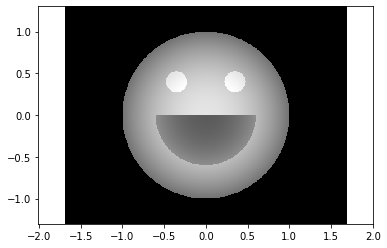

In [153]:
smi = 3
r = 1
res = 480
X,Y,Z = smiley_grad(smi, r, res)
smile = (Z / 2 * 255).astype(np.uint8)
if smi == 1:
    imageio.imwrite('smiley1.png', smile[::-1])
elif smi == 2:
    imageio.imwrite('smiley2.png', smile[::-1])
elif smi == 3:
    imageio.imwrite('smiley1.png', smile[::-1])

plt.pcolormesh(X,Y,Z, cmap='gray')
plt.axis('equal')
plt.show()